# Keşifsel Veri Analizi (EDA)

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [16]:
df=pd.read_excel('/content/side_effect_data.xlsx')

In [17]:
df.head()

,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.0,191.0
1,140,Male,1939-10-12,Turkiye,Trabzon,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,Toz,NaN,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",NaN,81.0,181.0
2,2,Female,1976-12-17,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.0,158.0
3,83,Male,1977-06-17,Turkiye,Adana,valproic acid,2022-01-04,2022-03-12,Sinirlilik,2022-02-08 01:01:21,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",NaN,Astim,"Kalp Hastaliklari, Kanser",AB RH-,NaN,165.0
4,7,Female,1976-09-03,Turkiye,Izmir,carbamazepine extended release,2022-01-13,2022-03-06,Agizda Farkli Bir Tat,2022-02-12 05:33:06,NaN,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,99.0,172.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Kullanici_id                      2357 non-null   int64         
 1   Cinsiyet                          1579 non-null   object        
 2   Dogum_Tarihi                      2357 non-null   datetime64[ns]
 3   Uyruk                             2357 non-null   object        
 4   Il                                2130 non-null   object        
 5   Ilac_Adi                          2357 non-null   object        
 6   Ilac_Baslangic_Tarihi             2357 non-null   datetime64[ns]
 7   Ilac_Bitis_Tarihi                 2357 non-null   datetime64[ns]
 8   Yan_Etki                          2357 non-null   object        
 9   Yan_Etki_Bildirim_Tarihi          2357 non-null   datetime64[ns]
 10  Alerjilerim                       1873 non-null 

In [19]:
df.shape

(2357, 19)

In [20]:
df.describe()

,Kullanici_id,Dogum_Tarihi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki_Bildirim_Tarihi,Kilo,Boy
count,2357.000000,2357,2357,2357,2357,2064.000000,2243.000000
mean,97.216801,1974-11-25 04:06:12.677131936,2022-01-07 10:47:36.173101312,2022-03-10 16:25:27.365294848,2022-02-10 17:09:30.742044928,80.863857,174.638431
min,1.000000,1939-10-12 00:00:00,2022-01-01 00:00:00,2022-03-02 00:00:00,2022-02-01 04:34:33,50.000000,145.000000
25%,47.000000,1959-02-05 00:00:00,2022-01-04 00:00:00,2022-03-06 00:00:00,2022-02-04 05:29:20,65.000000,160.000000
50%,97.000000,1973-09-09 00:00:00,2022-01-07 00:00:00,2022-03-11 00:00:00,2022-02-09 20:53:54,83.000000,176.000000
75%,146.000000,1992-03-24 00:00:00,2022-01-11 00:00:00,2022-03-15 00:00:00,2022-02-17 07:08:01,96.000000,187.000000
max,196.000000,2011-04-25 00:00:00,2022-01-14 00:00:00,2022-03-19 00:00:00,2022-02-19 21:47:39,110.000000,203.000000
std,57.017200,NaN,NaN,NaN,NaN,18.635269,16.516552


In [21]:
df.describe(include='object').T

,count,unique,top,freq
Cinsiyet,1579,2,Female,872
Uyruk,2357,1,Turkiye,2357
Il,2130,13,Adana,220
Ilac_Adi,2357,151,chlordiazepoxide-amitriptyline,29
Yan_Etki,2357,22,Agizda Farkli Bir Tat,229
Alerjilerim,1873,28,Domates,118
Kronik Hastaliklarim,1965,80,"Alzheimer, Diger",61
Baba Kronik Hastaliklari,2201,92,"Alzheimer, Diyabet",64
Anne Kronik Hastaliklari,2140,84,"Alzheimer, Astim",110
Kiz Kardes Kronik Hastaliklari,2260,85,,168


In [22]:
# Eksik değerleri hesapla
missing_values = df.isnull().sum()
missing_values_percent = (missing_values / len(df)) * 100
print(missing_values_percent)

Kullanici_id                         0.000000
Cinsiyet                            33.008061
Dogum_Tarihi                         0.000000
Uyruk                                0.000000
Il                                   9.630887
Ilac_Adi                             0.000000
Ilac_Baslangic_Tarihi                0.000000
Ilac_Bitis_Tarihi                    0.000000
Yan_Etki                             0.000000
Yan_Etki_Bildirim_Tarihi             0.000000
Alerjilerim                         20.534578
Kronik Hastaliklarim                16.631311
Baba Kronik Hastaliklari             6.618583
Anne Kronik Hastaliklari             9.206619
Kiz Kardes Kronik Hastaliklari       4.115401
Erkek Kardes Kronik Hastaliklari     5.133644
Kan Grubu                           14.722104
Kilo                                12.431056
Boy                                  4.836657
dtype: float64


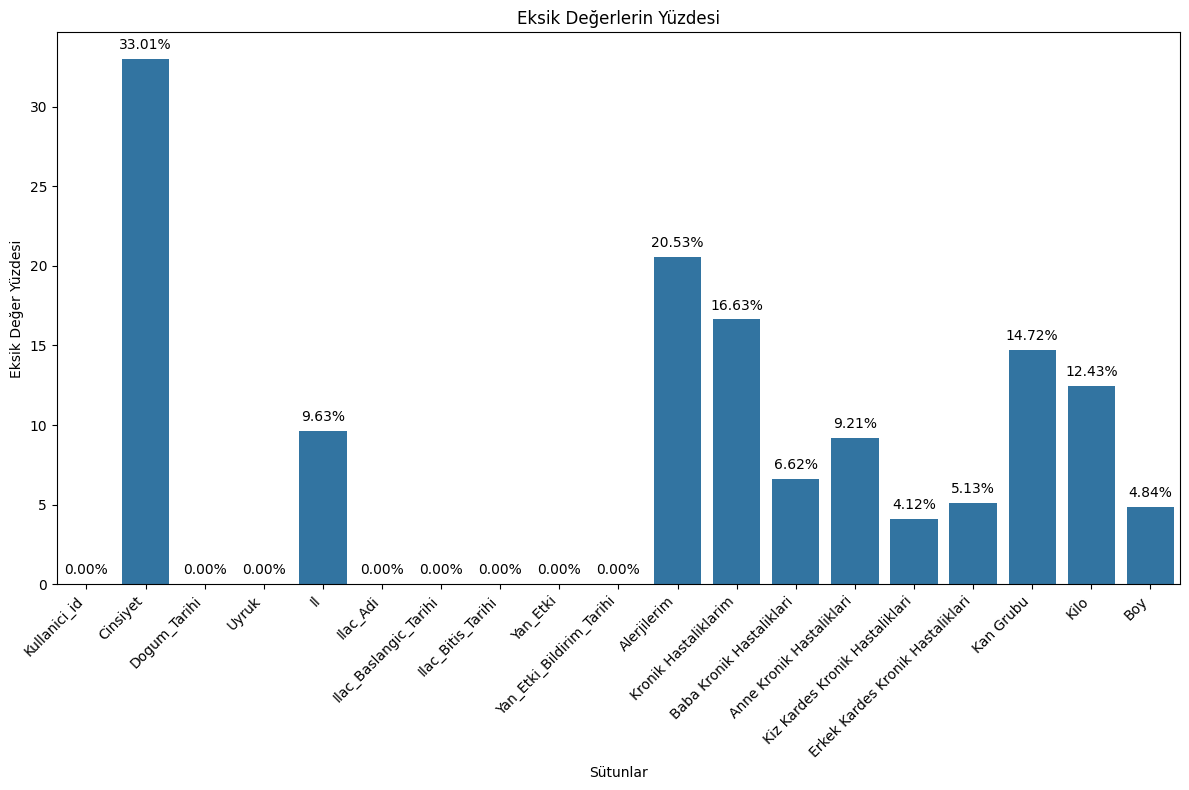

In [23]:
# Eksik değerlerin yüzdesini görselleştir
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=missing_values_percent.index, y=missing_values_percent)
plt.title('Eksik Değerlerin Yüzdesi')
plt.xlabel('Sütunlar')
plt.ylabel('Eksik Değer Yüzdesi')
plt.xticks(rotation=45, ha='right')

# Eksik değer yüzdesini çubukların üstünde göster
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


In [24]:
# Korelasyon
correlation = df['Boy'].corr(df['Kilo'])
print(f"Korelasyon: {correlation}")


Korelasyon: -0.1490155522360752


Buradaki negatif korelasyon değerine baktığımızda, boy ve kilo arasında çok güçlü bir ilişki olmadığını söyleyebiliriz. Korelasyon değeri 1'e ne kadar yakınsa, iki değişken arasındaki ilişki o kadar güçlüdür. Negatif değerlerde ise, ilişkinin zayıf olduğunu belirtebiliriz.

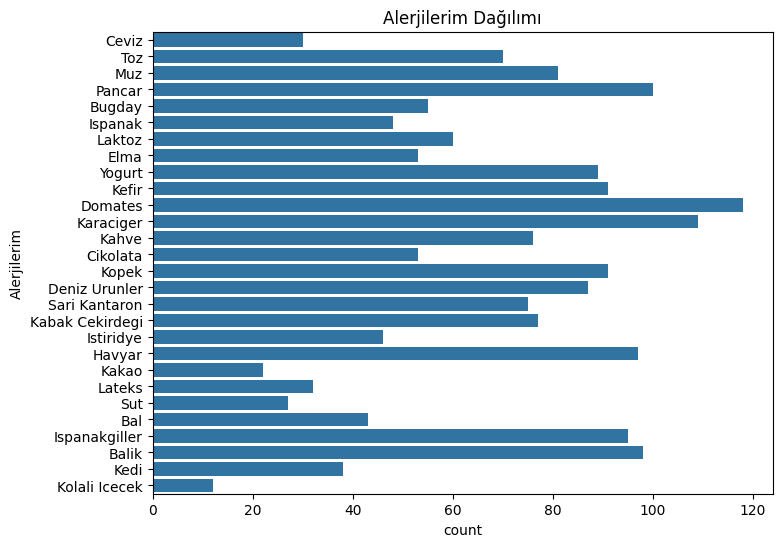

In [25]:
# Kronik hastalıkların dağılımı
alerji = df[['Alerjilerim']]

# Her hastalığın hangi sıklıkta ortaya çıktığını görselleştirin
for column in alerji.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(y=column, data=df)
    plt.title(f'{column} Dağılımı')
    plt.show()


Kullanıcılar için; en çok domatese karşı bir alerji görülmekteyken, en az kolalı içeçek için alerji görünmektedir.

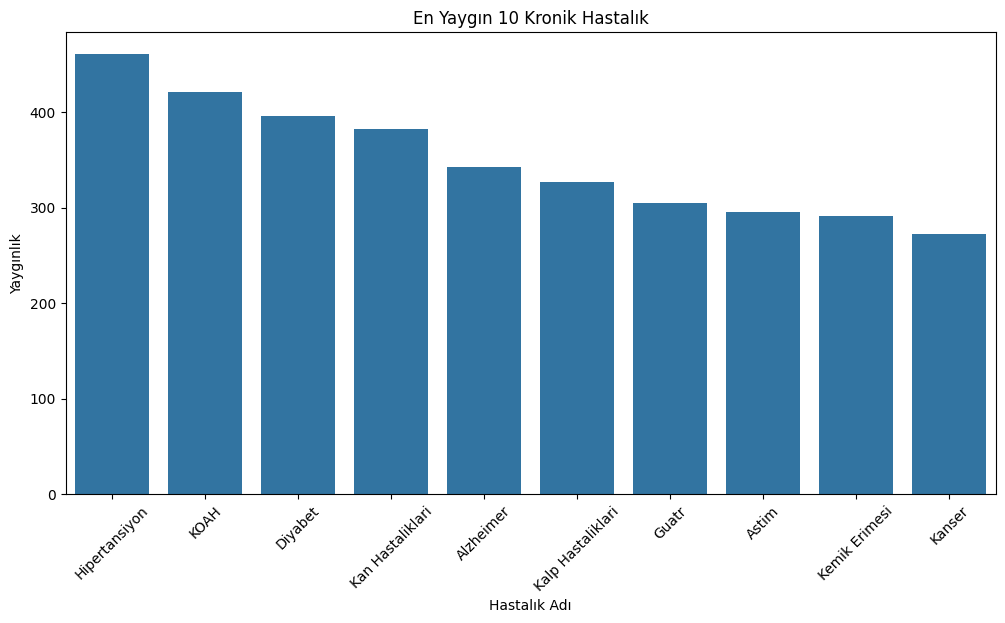

In [26]:
# Kronik hastalıkların sıklığını hesaplama
kronik_hastaliklar = df['Kronik Hastaliklarim'].str.split(', ')
kronik_hastaliklar = kronik_hastaliklar.explode()
hastalik_sikligi = kronik_hastaliklar.value_counts()

# En yaygın hastalıkları görselleştirme
plt.figure(figsize=(12, 6))
sns.barplot(x=hastalik_sikligi.index[:10], y=hastalik_sikligi.values[:10])
plt.xticks(rotation=45)
plt.title('En Yaygın 10 Kronik Hastalık')
plt.xlabel('Hastalık Adı')
plt.ylabel('Yaygınlık')
plt.show()


En yaygın 10 kronik hastalığa bakınca en çok görülen hastalığın hipertansiyon olduğu görülmektedir..

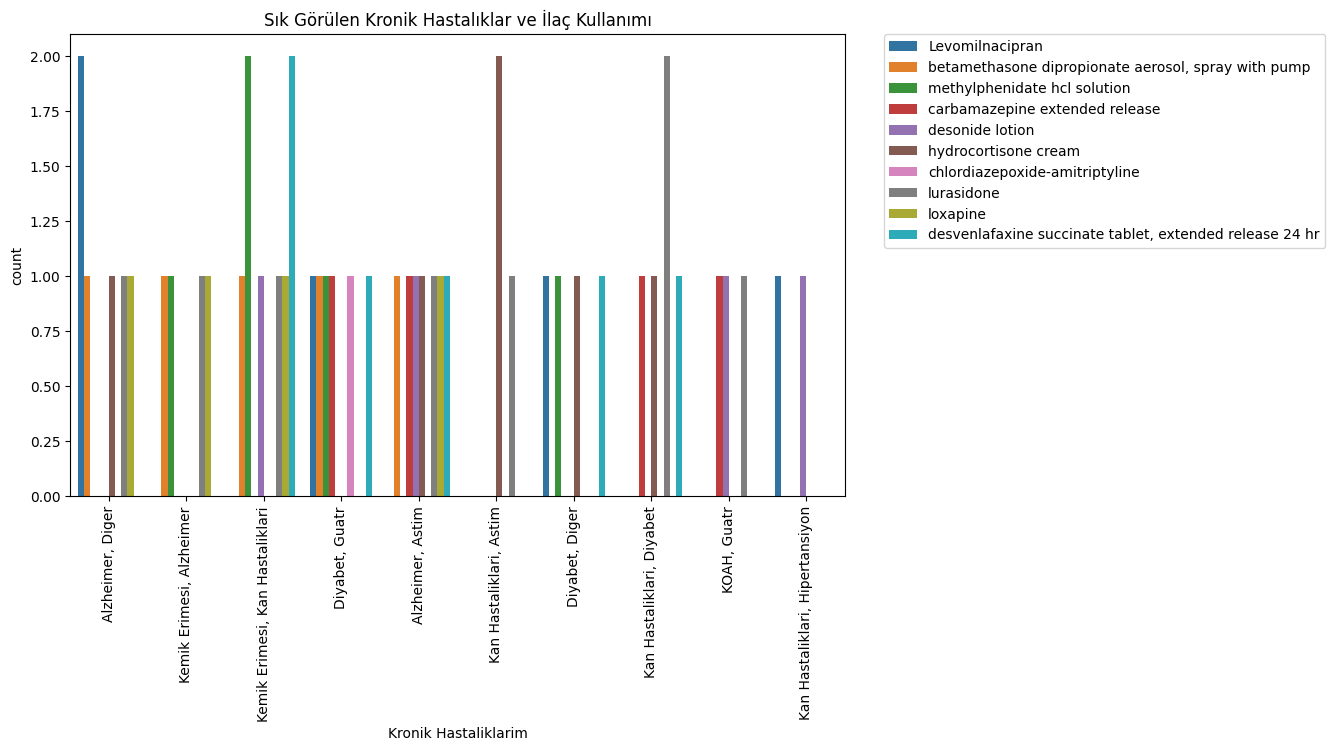

In [27]:
# En sık görülen hastalık ve ilaçları seçme (ilk 10'u)
top_hastaliklar = df['Kronik Hastaliklarim'].value_counts().nlargest(10).index
top_ilaclar = df['Ilac_Adi'].value_counts().nlargest(10).index

# Veri setini filtreleme
filtered_df = df[df['Kronik Hastaliklarim'].isin(top_hastaliklar) & df['Ilac_Adi'].isin(top_ilaclar)]

# Filtrelenmiş veriyi görselleştirme
plt.figure(figsize=(10, 6))
sns.countplot(x='Kronik Hastaliklarim', hue='Ilac_Adi', data=filtered_df, dodge=True)
plt.xticks(rotation=90)
plt.title('Sık Görülen Kronik Hastalıklar ve İlaç Kullanımı')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()



En çok kullanılan 10 ilaç ile en sık görülen 10 kronik hastalık için sıralama yaptığımızda ise Kan hastalıkları ve astım için en çok tercih edilen ilacın hdyrocortisone cream olduğunu söyleyebiliyoruz..

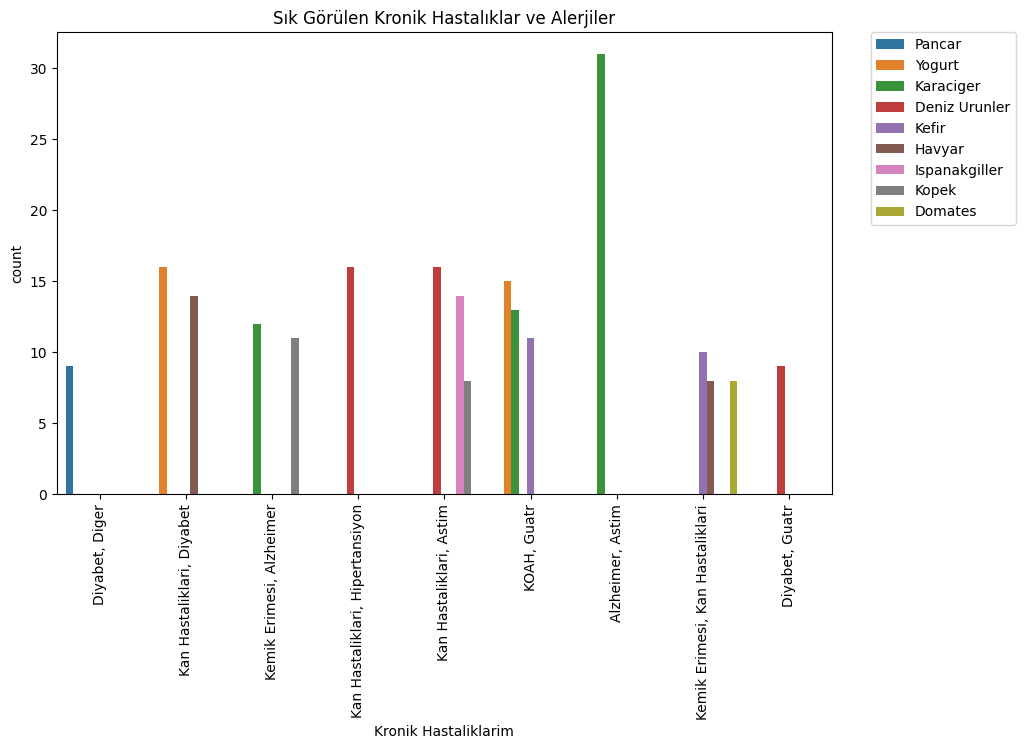

In [28]:
# En sık görülen hastalık ve alerjileri seçme (ilk 10'u)
top_hastaliklar = df['Kronik Hastaliklarim'].value_counts().nlargest(10).index
top_alerjiler = df['Alerjilerim'].value_counts().nlargest(10).index

# Veri setini filtreleme
filtered_df = df[df['Kronik Hastaliklarim'].isin(top_hastaliklar) & df['Alerjilerim'].isin(top_alerjiler)]

# Filtrelenmiş veriyi görselleştirme
plt.figure(figsize=(10, 6))
sns.countplot(x='Kronik Hastaliklarim', hue='Alerjilerim', data=filtered_df, dodge=True)
plt.xticks(rotation=90)
plt.title('Sık Görülen Kronik Hastalıklar ve Alerjiler')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

En çok kullanılan 10 alerji ile en sık görülen 10 kronik hastalık için sıralama yaptığımızda ise örn; Alzheimer, Astim hastalığında en çok karaciğere alerji görülmektedir..

In [29]:
# Yan etkilerin frekansını hesapla
yan_etki_frekansi = df['Yan_Etki'].value_counts()
print(yan_etki_frekansi)

Yan_Etki
Agizda Farkli Bir Tat    229
Tansiyon Yukselme        227
Yorgunluk                204
Gormede Bulaniklik       170
Kabizlik                 156
Ishal                    145
Az Uyuma                 141
Terleme                   97
Sinirlilik                81
Gec Bosalma               81
Gucsuzluk                 81
Mide Bulantisi            80
Tansiyon Dusuklugu        74
Carpinti                  72
Istah Artisi              71
Bas Agrisi                71
Karin Agrisi              69
Uykululuk Hali            68
Bulanti                   64
Huzursuzluk               63
Kas Agrisi                58
Deride Morarma            55
Name: count, dtype: int64


Bu çıktıya göre en sık görülen yan etki Agizda Farkli Bir Tat iken an az görülen yan etki eride Morarma çıkarımını yapabiliriz..

In [30]:
# Belirli hastalıklar için yan etki frekansını hesapla
belirli_hastaliklar = ['Kalp Hastaliklari', 'Diyabet', 'Hipertansiyon']  # İstediğiniz hastalıkları buraya ekleyin

for hastalik in belirli_hastaliklar:
    print(f"\n{hastalik} için yan etki frekansı:")

    # Hastalığı içeren satırları filtrele
    hastalik_df = df[df['Kronik Hastaliklarim'].str.contains(hastalik, na=False)]

    # Yan etki frekansını hesapla
    yan_etki_frekansi = hastalik_df['Yan_Etki'].value_counts()

    # Sonuçları yazdır
    print(yan_etki_frekansi)



Kalp Hastaliklari için yan etki frekansı:
Yan_Etki
Yorgunluk                40
Agizda Farkli Bir Tat    39
Tansiyon Yukselme        26
Gormede Bulaniklik       24
Az Uyuma                 19
Kabizlik                 18
Carpinti                 13
Tansiyon Dusuklugu       13
Ishal                    13
Bulanti                  12
Sinirlilik               12
Gucsuzluk                11
Istah Artisi             11
Mide Bulantisi           11
Gec Bosalma              10
Terleme                  10
Bas Agrisi               10
Karin Agrisi              8
Deride Morarma            8
Uykululuk Hali            7
Kas Agrisi                7
Huzursuzluk               5
Name: count, dtype: int64

Diyabet için yan etki frekansı:
Yan_Etki
Agizda Farkli Bir Tat    45
Tansiyon Yukselme        41
Gormede Bulaniklik       33
Yorgunluk                32
Kabizlik                 28
Az Uyuma                 23
Ishal                    20
Gucsuzluk                16
Bulanti                  15
Bas Agrisi  

Belirli hastalıklar için yan etkilerin görülme sayısına bakınca Diyabet için Agizda Farkli Bir Tatın, Hipertansiyon için tansiyon yükselmenin, kalp hastalıkları için yorgunluğun çok görüldüğü görülmektedir..

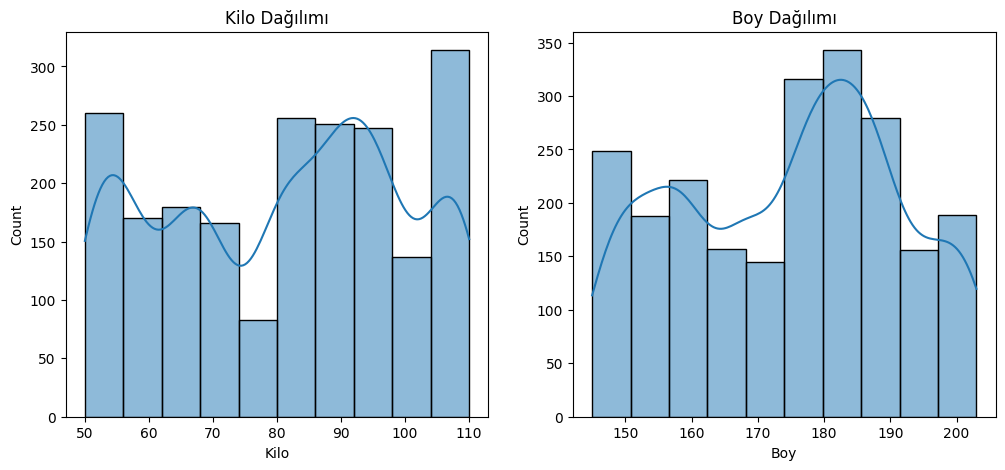

In [31]:
# Kilo ve Boy dağılımı
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Kilo'], bins=10, kde=True)
plt.title('Kilo Dağılımı')

plt.subplot(1, 2, 2)
sns.histplot(df['Boy'], bins=10, kde=True)
plt.title('Boy Dağılımı')

plt.show()

Kilo: Verilere bakıldığında, kiloların büyük çoğunluğunun 70-100 kg aralığında yoğunlaştığı görülmektedir. Bu, grubun büyük bir kısmının bu kiloya yakın olduğunu gösterir. Verinin en sık görüldüğü değer, yaklaşık olarak 100 kg civarındadır. Bu, grubun en yaygın kilo aralığını temsil eder. Grafikte hafifçe sağa doğru bir eğilim gözlemlenebilir. Bu, grubun bir kısmında daha yüksek kilolara doğru bir kayma olduğunu ve daha düşük kilolardaki birey sayısının nispeten daha az olduğunu gösterir.

Boy: Boylar ise 160-190 cm arasında daha sık görülmektedir. Bu, grubun çoğunluğunun bu boy aralığında olduğu anlamına gelir. Verinin en sık görüldüğü değer, yaklaşık olarak 180 cm civarındadır. Bu, grubun en yaygın boy aralığını temsil eder. Boy dağılımı, kilo dağılımına göre daha simetrik bir dağılım göstermektedir. Yani, boy değerleri ortalama değerin etrafında daha eşit bir şekilde dağılmıştır.

Aykırı değerler için grafik ve korelasyon analizi (ısı haritası) ön işleme aşamasında yer alıyor. Isı haritası, sayısal sütunlarda yapıldığı için verileri ön işlem sırasında sayısala dönüştürüyoruz. Aykırı değerler içinse, özellik ölçeklendirmeden sonra daha rahat gözlemlenebildiğinden, bu aşamada bir boxplot grafiği kullanıyoruz.

# Veri Ön İşleme

**1) Öznitelik Mühendisliği:**

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Kullanici_id                      2357 non-null   int64         
 1   Cinsiyet                          1579 non-null   object        
 2   Dogum_Tarihi                      2357 non-null   datetime64[ns]
 3   Uyruk                             2357 non-null   object        
 4   Il                                2130 non-null   object        
 5   Ilac_Adi                          2357 non-null   object        
 6   Ilac_Baslangic_Tarihi             2357 non-null   datetime64[ns]
 7   Ilac_Bitis_Tarihi                 2357 non-null   datetime64[ns]
 8   Yan_Etki                          2357 non-null   object        
 9   Yan_Etki_Bildirim_Tarihi          2357 non-null   datetime64[ns]
 10  Alerjilerim                       1873 non-null 

Öznitelik mühendisliği var olan özelliklerden modelin performasını artıracağımız yeni özellikler çıkarmaktır. Bu adım, model performansını artırarak, aykırı değerleri ve gürültüyü azaltarak, veri boyutunu küçülterek, öznitelikleri dönüştürerek ve veri anlamını iyileştirerek makine öğrenimi süreçlerini daha etkili hale getirir ve veri ön işleme için oldukça önemli bir adımdır. Burada 2 özellik örneği göstereceğim, bu adım model performansı için artırılabilir, başka özellikler de eklenebilir.

In [33]:
# Tarih sütunlarını datetime formatına çevirme
df['Ilac_Baslangic_Tarihi'] = pd.to_datetime(df['Ilac_Baslangic_Tarihi'])
df['Ilac_Bitis_Tarihi'] = pd.to_datetime(df['Ilac_Bitis_Tarihi'])

# İki tarih arasındaki farkı hesaplama ve yeni sütun olarak ekleme
df['Ilac_Kullanim_Suresi'] = (df['Ilac_Bitis_Tarihi'] - df['Ilac_Baslangic_Tarihi']).dt.days

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Kullanici_id                      2357 non-null   int64         
 1   Cinsiyet                          1579 non-null   object        
 2   Dogum_Tarihi                      2357 non-null   datetime64[ns]
 3   Uyruk                             2357 non-null   object        
 4   Il                                2130 non-null   object        
 5   Ilac_Adi                          2357 non-null   object        
 6   Ilac_Baslangic_Tarihi             2357 non-null   datetime64[ns]
 7   Ilac_Bitis_Tarihi                 2357 non-null   datetime64[ns]
 8   Yan_Etki                          2357 non-null   object        
 9   Yan_Etki_Bildirim_Tarihi          2357 non-null   datetime64[ns]
 10  Alerjilerim                       1873 non-null 

In [34]:
# BMI (Vücud Kitle İndeksi) hesaplama
df['BMI'] = df['Kilo'] / (df['Boy'] / 100) ** 2
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Kullanici_id                      2357 non-null   int64         
 1   Cinsiyet                          1579 non-null   object        
 2   Dogum_Tarihi                      2357 non-null   datetime64[ns]
 3   Uyruk                             2357 non-null   object        
 4   Il                                2130 non-null   object        
 5   Ilac_Adi                          2357 non-null   object        
 6   Ilac_Baslangic_Tarihi             2357 non-null   datetime64[ns]
 7   Ilac_Bitis_Tarihi                 2357 non-null   datetime64[ns]
 8   Yan_Etki                          2357 non-null   object        
 9   Yan_Etki_Bildirim_Tarihi          2357 non-null   datetime64[ns]
 10  Alerjilerim                       1873 non-null 

Görüldüğü üzere burada ilaç başlangıç tarihi ve ilaç bitiş tarihlerinden ilaç kullanım süresi, kilo ve boydan BMI(vücut kütle indeksi) sütunları eklendi. Model performansını artırmak amacıyla başka özellikler de çıkarılabilir..

**2) Eksik Değerlerin Yok Edilmesi**

In [35]:
# Boş değerleri olan satırları kaldırma
df = df.dropna(subset=['Cinsiyet'])
df= df.dropna(subset=['Il'])
df = df.dropna(subset=['Alerjilerim'])
df= df.dropna(subset=['Kronik Hastaliklarim'])
df= df.dropna(subset=['Baba Kronik Hastaliklari'])
df= df.dropna(subset=['Anne Kronik Hastaliklari'])
df= df.dropna(subset=['Kiz Kardes Kronik Hastaliklari'])
df= df.dropna(subset=['Erkek Kardes Kronik Hastaliklari'])
df= df.dropna(subset=['Kan Grubu'])
df= df.dropna(subset=['Kilo'])
df= df.dropna(subset=['Boy'])

print(df[['Cinsiyet','Il', 'Alerjilerim', 'Kronik Hastaliklarim', 'Baba Kronik Hastaliklari', 'Anne Kronik Hastaliklari', 'Kiz Kardes Kronik Hastaliklari', 'Erkek Kardes Kronik Hastaliklari', 'Kan Grubu', 'Kilo', 'Boy']].isnull().sum())


Cinsiyet                            0
Il                                  0
Alerjilerim                         0
Kronik Hastaliklarim                0
Baba Kronik Hastaliklari            0
Anne Kronik Hastaliklari            0
Kiz Kardes Kronik Hastaliklari      0
Erkek Kardes Kronik Hastaliklari    0
Kan Grubu                           0
Kilo                                0
Boy                                 0
dtype: int64


In [36]:
missing_values = df.isnull().sum()
missing_values_percent = (missing_values  / len(df)) * 100
print(missing_values_percent)

Kullanici_id                        0.0
Cinsiyet                            0.0
Dogum_Tarihi                        0.0
Uyruk                               0.0
Il                                  0.0
Ilac_Adi                            0.0
Ilac_Baslangic_Tarihi               0.0
Ilac_Bitis_Tarihi                   0.0
Yan_Etki                            0.0
Yan_Etki_Bildirim_Tarihi            0.0
Alerjilerim                         0.0
Kronik Hastaliklarim                0.0
Baba Kronik Hastaliklari            0.0
Anne Kronik Hastaliklari            0.0
Kiz Kardes Kronik Hastaliklari      0.0
Erkek Kardes Kronik Hastaliklari    0.0
Kan Grubu                           0.0
Kilo                                0.0
Boy                                 0.0
Ilac_Kullanim_Suresi                0.0
BMI                                 0.0
dtype: float64


Burada ilaç yan etkileriyle alakalı bir analiz yapmak istiyoruz. İlaç yan etkileri ile ilgili bir veri setinde tüm sütunların gerekli olup olmadığını belirlemek, analiz yapmak istediğiniz özel duruma ve hedefe bağlıdır. Modelleme sürecine ve amaca bağlı olarak belirli eksik değerin üzerindeki sütunlar da direkt veri setinden atılabilir. Ya da bizim burada yaptığımız gibi eksik değerdeki satırlar kaldırılabilir veya doldurma yöntemi baza alınarak mode(sayısal olmayan değerler), median ve mean (sayısal olan değerler) ile doldurulabilir.Ya da daha ileri KNN gibi model tabanlı yöntemler kullanabilir.. Burada da modelimizin performansına göre karar vereceğiz. Modelleme aşamasından sonra veri ön işleme aşamasına sürekli geri dönmek ve veri ön işleme aşamasını başka bakış açılarıyla düzenlemek bundandır, modelimizin performansını artırmak için..

**3) Modelleme Öncesi Değerleri Numeric Tipe Dönüştürme**

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 490 entries, 0 to 2351
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Kullanici_id                      490 non-null    int64         
 1   Cinsiyet                          490 non-null    object        
 2   Dogum_Tarihi                      490 non-null    datetime64[ns]
 3   Uyruk                             490 non-null    object        
 4   Il                                490 non-null    object        
 5   Ilac_Adi                          490 non-null    object        
 6   Ilac_Baslangic_Tarihi             490 non-null    datetime64[ns]
 7   Ilac_Bitis_Tarihi                 490 non-null    datetime64[ns]
 8   Yan_Etki                          490 non-null    object        
 9   Yan_Etki_Bildirim_Tarihi          490 non-null    datetime64[ns]
 10  Alerjilerim                       490 non-null    obje

Sütunlarımıza baktığımızda numeric olmayan sütunlarımız mevcut. Ancak makine öğrenini modelleri sayısal değerlerle çalıştığından numeric olmayan değerleri numeric tipe dönüştürmemiz lazım.

In [38]:
# Tarih sütunlarını datetime formatına dönüştürme
date_columns = ['Dogum_Tarihi', 'Ilac_Baslangic_Tarihi', 'Ilac_Bitis_Tarihi', 'Yan_Etki_Bildirim_Tarihi']

for column in date_columns:
    df[column] = pd.to_datetime(df[column])

# Timestamp'e dönüştürme (saniye cinsinden)
for column in date_columns:
    df[column] = (df[column] - pd.Timestamp('1970-01-01')) // pd.Timedelta('1s')

df.head()

,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,...,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy,Ilac_Kullanim_Suresi,BMI
0,107,Male,-310435200,Turkiye,Canakkale,trifluoperazine,1641686400,1646352000,Kabizlik,1645295323,...,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.0,191.0,54,28.233875
2,2,Female,219628800,Turkiye,Canakkale,warfarin sodium,1641859200,1647043200,Carpinti,1643952560,...,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.0,158.0,60,37.253645
18,156,Female,1181692800,Turkiye,Antalya,"selegiline patch, transdermal 24 hours",1641340800,1647648000,Istah Artisi,1645081681,...,"Kemik Erimesi, Alzheimer","Guatr, Kalp Hastaliklari",Kemik Erimesi,"Diyabet, Alzheimer","Kalp Hastaliklari, Alzheimer",AB RH-,80.0,171.0,73,27.358845
19,113,Male,1279843200,Turkiye,Trabzon,alprazolam,1641945600,1646352000,Terleme,1643847869,...,"KOAH, Kalp Hastaliklari","Astim, Guatr","Guatr, Kan Hastaliklari","KOAH, Kan Hastaliklari","Kan Hastaliklari, KOAH",0 RH+,76.0,155.0,51,31.633715
27,156,Female,1181692800,Turkiye,Antalya,"selegiline patch, transdermal 24 hours",1641427200,1646524800,Gucsuzluk,1643690073,...,"Kemik Erimesi, Alzheimer","Guatr, Kalp Hastaliklari",Kemik Erimesi,"Diyabet, Alzheimer","Kalp Hastaliklari, Alzheimer",AB RH-,80.0,171.0,59,27.358845


Bu nedenle burada tarih verilerini datetime formatına dönüştürerek ardından Unix zaman damgasına (timestamp) çevirerek sayısal bir formata dönüştürüyor, böylece analiz ve modelleme süreçlerinde kullanılabilir hale getiriyoruz.

In [39]:
#sayısal olmayan değerleri encode ederek sayısal formata dönüştürme (Sayısal olan sütunlar hariç)
def encode(df):
    # Sayısal sütunları belirle
    numeric_columns = df.select_dtypes(include=['number']).columns
    # Kategorik sütunları encode et
    for column in df.columns:
        if column not in numeric_columns:
            df[column] = df[column].factorize()[0]
    return df

# Fonksiyonu kullanma
df_en = encode(df.copy())


Factorization yöntemi, bu fonksiyonda sayısal olmayan kategorik verilerin sayısal verilere dönüştürülmesi için etkili bir yöntemdir. Bu dönüşüm, verilerin analiz ve modelleme süreçlerine dahil edilmesini sağlar. Ve burada da bu yöntem ile geriye kalan (sayısal sütunlar dışındaki) tüm kategorik değerleri sayısal formata çevirerek veri çerçevesini analiz ve modelleme için daha kullanışlı hale getiriyoruz .

In [40]:
df_en.info()

<class 'pandas.core.frame.DataFrame'>
Index: 490 entries, 0 to 2351
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Kullanici_id                      490 non-null    int64  
 1   Cinsiyet                          490 non-null    int64  
 2   Dogum_Tarihi                      490 non-null    int64  
 3   Uyruk                             490 non-null    int64  
 4   Il                                490 non-null    int64  
 5   Ilac_Adi                          490 non-null    int64  
 6   Ilac_Baslangic_Tarihi             490 non-null    int64  
 7   Ilac_Bitis_Tarihi                 490 non-null    int64  
 8   Yan_Etki                          490 non-null    int64  
 9   Yan_Etki_Bildirim_Tarihi          490 non-null    int64  
 10  Alerjilerim                       490 non-null    int64  
 11  Kronik Hastaliklarim              490 non-null    int64  
 12  Baba Kronik 

Ve artık görüldüğü gibi tüm değerlerimiz numeric ve modelleme sürecinde kullanıma uygun hale getirilmiş durumda..

**4) Özellik Ölçeklendirme**

In [41]:
# StandardScaler'ı başlatma
scaler = StandardScaler()

# Ölçeklenmesi gereken sütunların listesi
columns_to_scale = df_en.columns

# Veri kümesini kopyalama
df_en_scaled = df_en.copy()

# Ölçekleyiciyi veri kümesindeki gerekli sütunlara uygulama
df_en_scaled[columns_to_scale] = scaler.fit_transform(df_en[columns_to_scale])

df_en_scaled.head()


,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,...,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy,Ilac_Kullanim_Suresi,BMI
0,0.175708,-1.098730,-0.711191,0.0,-1.239215,-1.588268,0.362919,-1.429041,-1.729697,1.408805,...,-1.664522,-1.631377,-1.641597,-1.762560,-1.586509,-1.113460,0.999566,1.096263,-1.355354,-0.037383
2,-1.660235,0.910142,0.064348,0.0,-1.239215,-1.563477,0.870280,0.147166,-1.551826,-1.046423,...,-1.555512,-1.535205,-1.543081,-1.656198,-1.484703,-1.113460,0.478016,-1.017315,-0.418870,0.969139
18,1.032482,0.910142,1.471949,0.0,-0.969700,-1.538686,-0.651804,1.526347,-1.373956,1.018163,...,-1.446501,-1.439034,-1.444565,-1.549837,-1.382898,-0.656895,-0.199998,-0.184693,1.610179,-0.135028
19,0.280619,-1.098730,1.615553,0.0,-0.700186,-1.513896,1.123961,-1.429041,-1.196086,-1.237849,...,-1.337491,-1.342863,-1.346049,-1.443476,-1.281092,-0.200330,-0.408618,-1.209458,-1.823596,0.342007
27,1.032482,0.910142,1.471949,0.0,-0.969700,-1.538686,-0.398124,-1.034989,-1.018216,-1.526377,...,-1.446501,-1.439034,-1.444565,-1.549837,-1.382898,-0.656895,-0.199998,-0.184693,-0.574950,-0.135028


Özellik ölçeklendirme, verilerin uyumlu hale gelmesini sağlayarak analiz ve modelleme süreçlerinde sorunları önler; model performansını artırır, aykırı değerlerin tespitini kolaylaştırır ve görselleştirmeleri daha anlamlı hale getirir. Bu nedenle önce özelliklerimiz ölçeklendiriyoruz.

**5) Aykırı Değerlerin Yok Edilmesi**

In [42]:
# Sadece sayısal sütunları seçme
numeric_df = df_en_scaled.select_dtypes(include='number')

# Aykırı değer oranlarını hesaplama
outlier_ratios = {}
total_outliers = 0
total_values = 0

for column in numeric_df.columns:
    data = numeric_df[column]

    # Z-Score hesaplama
    z_scores = stats.zscore(data)
    abs_z_scores = abs(z_scores)

    # Aykırı değerleri belirleme ( çoğunlukla z > 3 olanlar tercih edilmektedir..)
    outliers = abs_z_scores > 3

    # Aykırı değer oranını hesaplama
    num_outliers = outliers.sum()
    num_total = len(data)
    outlier_ratio = num_outliers / num_total

    # Her sütun için aykırı değer oranını saklama
    outlier_ratios[column] = outlier_ratio

    # Toplam aykırı değer ve veri noktası sayısını güncelleme
    total_outliers += num_outliers
    total_values += num_total

# Genel aykırı değer oranını hesaplama
overall_outlier_ratio = total_outliers / total_values

# Sonuçları yazdırma
#for column, ratio in outlier_ratios.items():
    #print(f"Sütun '{column}' için Aykırı Değer Oranı: {ratio:.2%}")

print(f"Toplam Aykırı Değer Sayısı: {total_outliers}")
print(f"Toplam Veri Noktası Sayısı: {total_values}")
print(f"Genel Aykırı Değer Oranı: {overall_outlier_ratio:.2%}")


Toplam Aykırı Değer Sayısı: 0
Toplam Veri Noktası Sayısı: 10290
Genel Aykırı Değer Oranı: 0.00%


Aykırı değer tespiti için birçok farklı yöntem kullanılabilir ve modelin performansını optimize etmek amacıyla bu yöntemler ile aykırı değerleri ele alıp yok etmek önemlidir. Ben burada z-score yöntemini denedim ve veri setinde aykırı değer bulunmadığını gözlemledim. Ancak, bazen yöntemler yanlış sonuçlar verebileceğinden, bir diğer yöntem olan boxplot'u da denedim.

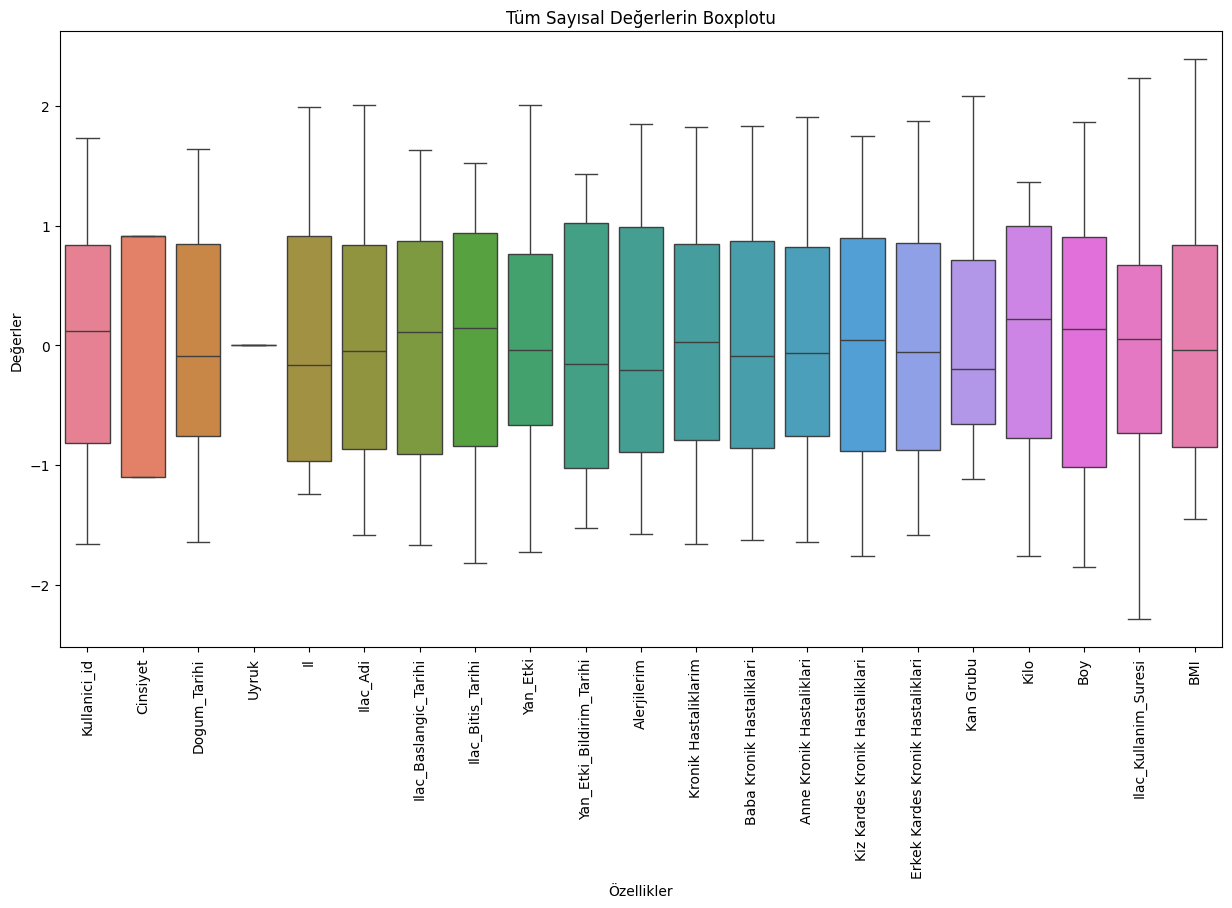

In [43]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_en_scaled)
plt.title('Tüm Sayısal Değerlerin Boxplotu')
plt.xlabel('Özellikler')
plt.ylabel('Değerler')

#sütun isimlerini dik ayarlama
plt.xticks(rotation=90)
plt.show()

Bu yöntemde min-max uçlara baktığımda nokta ve yıldızların olmadığını gördüm, bu da veri setimde gerçekten aykırı değerlerin olmadığını kanıtlıyor. Boxplot'ta aykırı değerler, genellikle kutunun dışında kalan nokta veya yıldızlar olarak gösterilir; bu nedenle bu grafik sayesinde veri setimde aykırı değer bulunmadığını belirlemek mümkün oldu. Sonuç olarak, her iki yöntemi de kullanarak aykırı değer tespitinin doğruluğunu sağlamış oldum.

**6) Korelasyon Analizi**

In [44]:
df_en.info()

<class 'pandas.core.frame.DataFrame'>
Index: 490 entries, 0 to 2351
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Kullanici_id                      490 non-null    int64  
 1   Cinsiyet                          490 non-null    int64  
 2   Dogum_Tarihi                      490 non-null    int64  
 3   Uyruk                             490 non-null    int64  
 4   Il                                490 non-null    int64  
 5   Ilac_Adi                          490 non-null    int64  
 6   Ilac_Baslangic_Tarihi             490 non-null    int64  
 7   Ilac_Bitis_Tarihi                 490 non-null    int64  
 8   Yan_Etki                          490 non-null    int64  
 9   Yan_Etki_Bildirim_Tarihi          490 non-null    int64  
 10  Alerjilerim                       490 non-null    int64  
 11  Kronik Hastaliklarim              490 non-null    int64  
 12  Baba Kronik 

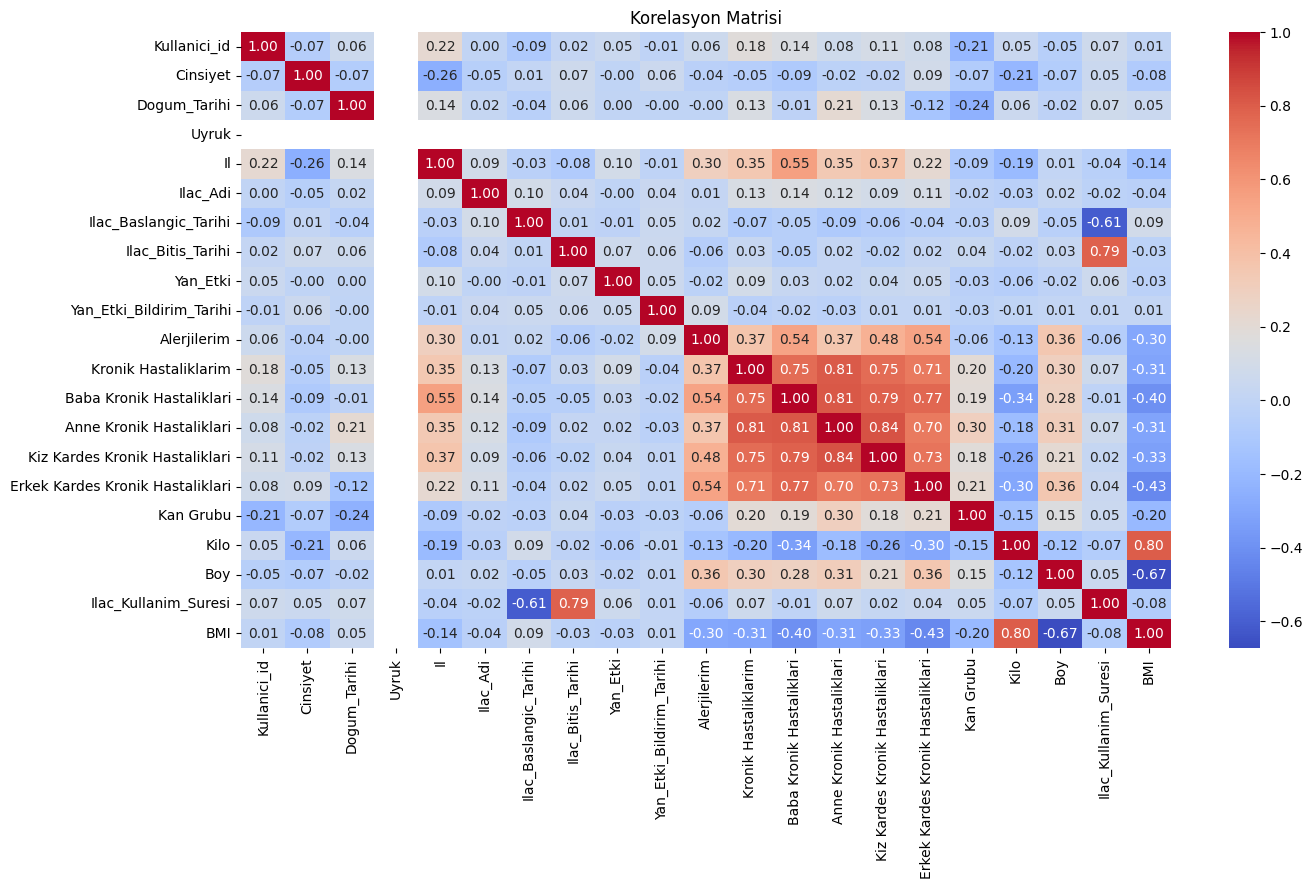

In [45]:
# Korelasyon matrisini oluşturma
correlation_matrix = df_en.corr()

plt.figure(figsize=(15, 8))
sns.heatmap(
    correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f"
    )
plt.title('Korelasyon Matrisi')
plt.show()

Korelasyon analizi modelleme aşaması için oldukça önemlidir. Korelasyon analizi ile modellemede fikir olması adına bir korelasyon analizi yapıyor ve veriler arasındaki bağlantıları buluyoruz.. Burada değer 1' ne kadar yaklaşırsa o kadar güçlü bağ var, ne kadar - değerlerde ise o kadar zayıf bir bağ var diyebiliriz.. Mesela bu örnekte Anne, Baba, Kız kardeş, Erkek kardeş kronik hastalıklarıyla kullanıcın kronik hastalıkları arasında güçlü bir bağ olduğu görülmektedir. Onun  dışında korelasyon matrisinde uyruk sütunu için bir korelasyon çizilmediğini görüyoruz, mantığını aşağıda açıklayalım:

In [46]:
print(correlation_matrix['Uyruk'])


Kullanici_id                       NaN
Cinsiyet                           NaN
Dogum_Tarihi                       NaN
Uyruk                              NaN
Il                                 NaN
Ilac_Adi                           NaN
Ilac_Baslangic_Tarihi              NaN
Ilac_Bitis_Tarihi                  NaN
Yan_Etki                           NaN
Yan_Etki_Bildirim_Tarihi           NaN
Alerjilerim                        NaN
Kronik Hastaliklarim               NaN
Baba Kronik Hastaliklari           NaN
Anne Kronik Hastaliklari           NaN
Kiz Kardes Kronik Hastaliklari     NaN
Erkek Kardes Kronik Hastaliklari   NaN
Kan Grubu                          NaN
Kilo                               NaN
Boy                                NaN
Ilac_Kullanim_Suresi               NaN
BMI                                NaN
Name: Uyruk, dtype: float64


Ve bu noktada da uyruk sütununun diğer sütunlarla korelasyonunun NaN olduğu görülmektedir. Bunun nedenine bakıcak olursak aslında hem tipi hem de boş değer olmaması bu sütunun korelasyona uyumlu olduğunu göstermektedir. Ama bazen sütunlarda korelasyon hesaplanması için yeterli veri olmayabilir ve korelasyon bundan da hesaplanmayabilir..

In [47]:
print(df['Uyruk'].unique())

['Turkiye']


Bu ihtimale karşı bu sütundaki benzersiz değerleri saydırıyoruz ve sütunda sadece 'Turkiye' olduğunu görüyoruz. Bu durumda sütun yalnızca tek bir kategori içermektedir. Bu nedenle, korelasyon hesaplamak için yeterli veri olmadığını görüyoruz. Korelasyon analizi, iki veya daha fazla değişken arasındaki ilişkiyi incelemek için gereklidir. Bu nedenle bu sütun için korelasyon hesaplanamamaktadır..